In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Users\DELL\Desktop\ML\Projects & Datasets\Predict Match HackerEarth\dataset\data.csv')
df.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,...,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,...,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,...,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,...,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,...,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city


In [3]:
df.isnull().sum()

user_id                0
username               0
age                    0
status                 0
sex                    0
orientation            0
drinks                 0
drugs                  0
height                 0
job                    0
location               0
pets                   0
smokes                 0
language               0
new_languages          0
body_profile           0
education_level        0
dropped_out            0
bio                    0
interests              0
other_interests        0
location_preference    0
dtype: int64

In [4]:
df1 = df.copy()

In [5]:
status = pd.get_dummies(df['status'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df = df.drop(['status'], axis=1)
df = df.drop(['username'], axis=1)

In [6]:
'''sex = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, sex], axis = 1)
df = df.drop(['sex'], axis=1)

orie = pd.get_dummies(df['orientation'], drop_first = True)
df = pd.concat([df, orie], axis = 1)
df = df.drop(['orientation'], axis=1)'''

drinks = pd.get_dummies(df['drinks'], drop_first = True)
df = pd.concat([df, drinks], axis = 1)
df = df.drop(['drinks'], axis=1)

drugs = pd.get_dummies(df['drugs'], drop_first = True)
df = pd.concat([df, drugs], axis = 1)
df = df.drop(['drugs'], axis=1)

smokes = pd.get_dummies(df['smokes'], drop_first = True)
df = pd.concat([df, smokes], axis = 1)
df = df.drop(['smokes'], axis=1)

new_lang = pd.get_dummies(df['new_languages'], drop_first = True)
df = pd.concat([df, new_lang], axis = 1)
df = df.drop(['new_languages'], axis=1)

drop = pd.get_dummies(df['dropped_out'], drop_first = True)
df = pd.concat([df, drop], axis = 1)
df = df.drop(['dropped_out'], axis=1)

loc_pref = pd.get_dummies(df['location_preference'], drop_first = True)
df = pd.concat([df, loc_pref], axis = 1)
df = df.drop(['location_preference'], axis=1)

In [7]:
#df = df.set_index('user_id')

job = pd.get_dummies(df['job'], drop_first = True)
df = pd.concat([df, job], axis = 1)
df = df.drop(['job'], axis=1)

loc = pd.get_dummies(df['location'], drop_first = True)
df = pd.concat([df, loc], axis = 1)
df = df.drop(['location'], axis=1)

pets = pd.get_dummies(df['pets'], drop_first = True)
df = pd.concat([df, pets], axis = 1)
df = df.drop(['pets'], axis=1)

body = pd.get_dummies(df['body_profile'], drop_first = True)
df = pd.concat([df, body], axis = 1)
df = df.drop(['body_profile'], axis=1)

df.head()

,user_id,age,sex,orientation,height,language,education_level,bio,interests,other_interests,...,average,curvy,fit,full figured,jacked,overweight,rather not say,skinny,thin,used up
0,fffe3100,27,f,gay,66.0,"english (fluently), spanish (poorly), sign lan...",4.0,bottom line i love life! i work hard and i lov...,sports,instruments,...,0,0,0,0,0,0,0,0,0,0
1,fffe3200,26,m,gay,68.0,"english (fluently), tagalog (okay), french (po...",3.0,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,...,0,0,1,0,0,0,0,0,0,0
2,fffe3300,20,f,bisexual,69.0,"english (fluently), sign language (poorly), fr...",2.0,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,...,0,0,1,0,0,0,0,0,0,0
3,fffe3400,27,m,bisexual,68.0,english,3.0,i'm a stealth geek. that special mix of techni...,sketching,acting,...,1,0,0,0,0,0,0,0,0,0
4,fffe3500,22,f,bisexual,68.0,english,2.0,with the whisper of the wind i was weaved into...,craft,designing,...,1,0,0,0,0,0,0,0,0,0


In [8]:
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures,BigramCollocationFinder
import re

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
lemma=WordNetLemmatizer()
def tokenize(text):
    #creating a library of stopwords
    stops=stopwords.words('english')
    
    #convert everything to lower
    text=text.lower()
    text=text.replace('.','')
    text=text.replace(',','')
    text=text.replace("'",'')
    text=text.replace('!','')
    text = re.sub(r'\d+', '', text)

    text=text.split(" ")
    text = [i for i in text if i!=" "]
    text=[lemma.lemmatize(i) for i in text if i not in stops]
    
    #splitting on the basis of spaes b/w words
    
    return text

df['bio'] = df.bio.apply(tokenize)
df.head()

,user_id,age,sex,orientation,height,language,education_level,bio,interests,other_interests,...,average,curvy,fit,full figured,jacked,overweight,rather not say,skinny,thin,used up
0,fffe3100,27,f,gay,66.0,"english (fluently), spanish (poorly), sign lan...",4.0,"[bottom, line, love, life, work, hard, love, h...",sports,instruments,...,0,0,0,0,0,0,0,0,0,0
1,fffe3200,26,m,gay,68.0,"english (fluently), tagalog (okay), french (po...",3.0,"[im, straightforward, genuine, fun, loving, (i...",painting,instruments,...,0,0,1,0,0,0,0,0,0,0
2,fffe3300,20,f,bisexual,69.0,"english (fluently), sign language (poorly), fr...",2.0,"[mmmmm, yummy, taco, yoga, love, life, part, c...",instruments,dancing,...,0,0,1,0,0,0,0,0,0,0
3,fffe3400,27,m,bisexual,68.0,english,3.0,"[im, stealth, geek, special, mix, technical, o...",sketching,acting,...,1,0,0,0,0,0,0,0,0,0
4,fffe3500,22,f,bisexual,68.0,english,2.0,"[whisper, wind, weaved, curl, crashing, wave, ...",craft,designing,...,1,0,0,0,0,0,0,0,0,0


In [11]:
lang = pd.get_dummies(df['language'], drop_first = True)
df = pd.concat([df, lang], axis = 1)
df = df.drop(['language'], axis=1)
df = df.drop(['sex'], axis=1)
df = df.drop(['orientation'], axis=1)
pd.set_option('display.max_columns', 500)

In [12]:
new_df = df[['user_id', 'bio', 'interests', 'other_interests']]
new_df.set_index(['user_id'], inplace=True)

In [13]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col != 'bio':
            words = words + ' ' + row[col] + ' '
        else:
            words = words + ' '.join(row[col])
        
    
    row['bag_of_words'] = words

new_df.drop(columns = [col for col in new_df.columns if col != 'bag_of_words'], inplace = True)
new_df.head()

<ipython-input-13-f98813cd7e65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bag_of_words'] = ''
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,bag_of_words
user_id,
fffe3100,bottom line love life work hard love hard im e...
fffe3200,im straightforward genuine fun loving (im seri...
fffe3300,mmmmm yummy taco yoga love life part content p...
fffe3400,im stealth geek special mix technical obsessio...
fffe3500,whisper wind weaved curl crashing wave tide sp...


In [14]:
new_df['bag_of_words'][0]

'bottom line love life work hard love hard im earth drama free plan keep way want know ask im woman love woman sometimes feel like nut sometimes dont femme side butch side love trying new thing spend day helping people check list im going love making people laugh im open meeting new people dating point im taking care heart rushing anything value communication open-minded sports  instruments   '

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count = CountVectorizer(max_features = 1200)
count_matrix = count.fit_transform(new_df['bag_of_words'])

In [16]:
df_words = pd.DataFrame(count_matrix.toarray(), columns=count.get_feature_names())
df_words.set_index(df['user_id'], inplace =True)
df.set_index(df['user_id'], inplace=True)
df_words.head()

,ability,able,abroad,absolutely,accent,across,act,acting,action,active,activity,actually,add,admit,adore,adult,adventure,adventurous,affectionate,afraid,age,ago,air,alive,all,almost,alone,along,alot,already,also,although,always,amazing,ambitious,america,american,amount,and,animal,anime,another,answer,anyone,anything,anyway,anywhere,appreciate,area,arent,around,art,artist,artistic,as,asian,ask,aspect,astronomy,athletic,attention,attitude,attracted,attractive,available,average,avid,aware,away,awesome,awkward,back,backpacking,bad,balance,balanced,band,bar,baseball,based,basic,basically,basketball,bay,beach,beautiful,beauty,become,bed,beer,begin,behind,belief,believe,berkeley,best,better,bicycle,big,bike,biking,bit,black,blue,board,body,book,bored,boring,born,boston,box,boy,brain,break,bring,brother,build,building,bunch,burning,business,busy,but,buy,ca,cal,california,call,called,calligraphy,calm,came,camping,cannot,cant,capable,car,card,care,career,caring,carry,case,casual,cat,cause,certain,challenge,chance,change,changing,character,check,checking,chemistry,chicago,child,chill,chocolate,choice,church,circle,city,class,clean,clear,climb,climbing,close,club,coast,coffee,cold,collectibles,college,color,come,comedy,comfort,comfortable,coming,committed,common,communication,community,company,compassion,compassionate,competitive,complete,completely,computer,concert,confident,connect,connection,consider,considerate,constantly,content,continue,conversation,cook,cooking,cool,corner,couch,could,couldnt,count,country,couple,course,craft,crazy,create,creating,creative,creativity,crime,cuddling,culture,cup,curiosity,curious,current,currently,cut,cute,cycling,dad,daily,dance,dancing,dark,date,dating,daughter,day,dc,deal,decent,decided,deep,deeply,definitely,degree,describe,described,...,software,someday,someone,something,sometimes,somewhat,somewhere,son,song,soon,sorry,sort,soul,sound,south,southern,space,spain,spanish,speak,special,spend,spending,spent,spirit,spiritual,spontaneity,spontaneous,sport,sports,stable,stand,star,start,started,starting,state,stay,staying,step,still,stop,store,story,straight,strange,stranger,street,strive,strong,student,studied,study,studying,stuff,stupid,style,successful,summary,summer,sun,sunday,super,support,suppose,sure,surfing,sweet,swimming,tahoe,take,taken,taking,talk,talking,tall,taste,tasting,tattoo,taught,teach,teacher,teaching,team,tech,technology,tell,tend,tennis,term,terrible,th,thanks,that,thats,the,theater,theatre,there,theyre,thing,things,think,thinker,thinking,this,though,thought,thoughtful,three,throw,time,to,today,together,told,ton,too,took,top,total,totally,touch,towards,town,trail,training,transplant,travel,traveled,traveling,travelling,treat,tree,tried,trip,true,truly,trust,truth,try,trying,turn,tv,twice,two,type,typical,uc,understand,understanding,unique,university,unless,up,update,urban,use,used,using,usually,vacation,valley,value,variety,various,vegan,vegetarian,video,view,visit,visiting,volunteer,wait,walk,walking,wall,wanna,want,wanted,wanting,warm,watch,watching,water,way,wear,weather,week,weekend,weird,welcome,well,went,west,what,whatever,whats,whenever,whether,which,white,who,whole,wide,wild,willing,wine,winter,wish,wit,with,within,without,witty,woman,wonder,wonderful,wont,wood,word,work,worked,worker,working,world,worry,worth,would,wouldnt,write,writer,writing,writting,wrong,ya,yeah,year,yes,yet,yoga,york,you,youd,youll,young,younger,youre,youve,yr
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fffe3100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
final_df = pd.concat([df, df_words], axis=1)
final_df.head()

,user_id,age,height,education_level,bio,interests,other_interests,married,seeing someone,single,not at all,often,rarely,socially,very often,often,sometimes,sometimes,trying to quit,when drinking,yes,not interested,somewhat interested,yes,same city,same state,banking / financial / real estate,clerical / administrative,computer / hardware / software,construction / craftsmanship,education / academia,entertainment / media,executive / management,hospitality / travel,law / legal services,medicine / health,military,other,political / government,rather not say,retired,sales / marketing / biz dev,science / tech / engineering,student,transportation,unemployed,"albany, california","atherton, california","belmont, california","belvedere tiburon, california","benicia, california","berkeley, california","brisbane, california","brooklyn, new york","burlingame, california","canyon country, california","castro valley, california","cincinnati, ohio","corte madera, california","daly city, california","el cerrito, california","el sobrante, california","emeryville, california","fairfax, california","foster city, california","fremont, california","green brae, california","hacienda heights, california","half moon bay, california","hayward, california","hercules, california","lafayette, california","lagunitas, california","larkspur, california","martinez, california","menlo park, california","mill valley, california","millbrae, california","montara, california","moraga, california","moss beach, california","mountain view, california","nha trang, vietnam","north hollywood, california","novato, california","oakland, california","orinda, california","pacifica, california","palo alto, california","petaluma, california","phoenix, arizona","pinole, california","pleasant hill, california","point richmond, california","redwood city, california","richmond, california","rodeo, california","san anselmo, california","san bruno, california","san carlos, california","san francisco, california","san leandro, california","san lorenzo, california","san mateo, california","san pablo, california","san rafael, california","santa rosa, california","sausalito, california","south san francisco, california","stanford, california","stockton, california","vallejo, california","walnut creek, california","woodacre, california","woodside, california",dislikes dogs,dislikes dogs and dislikes cats,dislikes dogs and has cats,dislikes dogs and likes cats,has cats,has dogs,has dogs and dislikes cats,has dogs and has cats,has dogs and likes cats,likes cats,likes dogs,likes dogs and dislikes cats,likes dogs and has cats,likes dogs and likes cats,athletic,average,curvy,fit,full figured,jacked,overweight,rather not say,skinny,thin,used up,english (fluently),"english (fluently), afrikaans (fluently), dutch (okay), german (poorly)","english (fluently), ancient greek (poorly)","english (fluently), arabic (fluently)","english (fluently), arabic (fluently), spanish (okay)","english (fluently), arabic (fluently), spanish (poorly)","english (fluently), arabic (okay), french (poorly)","english (fluently), arabic (okay), spanish (okay)","english (fluently), arabic (poorly), urdu (poorly)","english (fluently), armenian (okay), russian (fluently)","english (fluently), bengali (fluently), hindi (fluently)","english (fluently), bengali (fluently), hindi (okay), urdu (poorly)","english (fluently), bengali (okay)","english (fluently), bulgarian (fluently), russian (fluently), french (okay), spanish (poorly)","english (fluently), c++ (fluently)","english (fluently), c++ (fluently), french (fluently), spanish (fluently), chinese (poorly)","english (fluently), c++ (fluently), german (poorly)","english (fluently), c++ (fluently), lisp (poorly)","english (fluently), c++ (fluently), spanish (poorly)","english (fluently), c++ (fluently), tamil (fluently), japanese (okay)","english (fluently), c++ (okay)","english (fluently), c++ (okay), french (poorly), lisp (poorly)","english (fluently), c++ (okay), german (p

In [18]:
final_df = final_df.drop(['interests'], axis=1)
final_df = final_df.drop(['other_interests'], axis=1)
final_df = final_df.drop(['bio'], axis=1)
final_df = final_df.set_index('user_id')

In [19]:
pd.set_option('display.max_rows', 6000)
final_df.dtypes

age                                                                                                         int64
height                                                                                                    float64
education_level                                                                                           float64
married                                                                                                     uint8
seeing someone                                                                                              uint8
single                                                                                                      uint8
not at all                                                                                                  uint8
often                                                                                                       uint8
rarely                                                                                  

In [20]:
final_df.isnull().sum()

age                                                                                                       0
height                                                                                                    0
education_level                                                                                           0
married                                                                                                   0
seeing someone                                                                                            0
single                                                                                                    0
not at all                                                                                                0
often                                                                                                     0
rarely                                                                                                    0
socially                    

In [21]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(final_df)

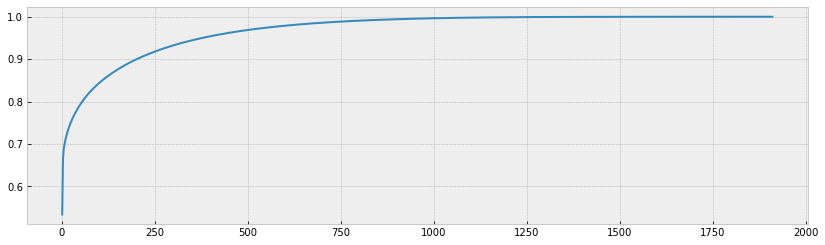

In [22]:
# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,final_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

In [23]:
# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = final_df.shape[1] - n_over_95

# Printing out the number of features needed to retain 95% variance
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca = pca.fit_transform(final_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])

Number features: 377
Total Variance Explained: 0.9501399231529956
0.9492076492927143


In [24]:
len(pca.explained_variance_ratio_)

377

In [25]:
df_pca.shape[0]
df_pca = pd.DataFrame(df_pca)
df_pca.set_index(df1['user_id'], inplace=True)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(final_df, final_df)
cosine_sim

array([[1.        , 0.96080932, 0.98007001, ..., 0.9819836 , 0.98111885,
        0.97625794],
       [0.96080932, 1.        , 0.95979227, ..., 0.95854634, 0.95838461,
        0.94405635],
       [0.98007001, 0.95979227, 1.        , ..., 0.98160685, 0.97405751,
        0.95500782],
       ...,
       [0.9819836 , 0.95854634, 0.98160685, ..., 1.        , 0.98335114,
        0.97527459],
       [0.98111885, 0.95838461, 0.97405751, ..., 0.98335114, 1.        ,
        0.98184404],
       [0.97625794, 0.94405635, 0.95500782, ..., 0.97527459, 0.98184404,
        1.        ]])

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(df_pca, df_pca)
cosine_sim

array([[ 1.        ,  0.26477838,  0.49510755, ...,  0.14134778,
         0.02922419, -0.38496089],
       [ 0.26477838,  1.        ,  0.35563921, ...,  0.15184373,
         0.12135106, -0.38363071],
       [ 0.49510755,  0.35563921,  1.        , ...,  0.43970363,
         0.1418011 , -0.74687746],
       ...,
       [ 0.14134778,  0.15184373,  0.43970363, ...,  1.        ,
         0.09226227, -0.4409077 ],
       [ 0.02922419,  0.12135106,  0.1418011 , ...,  0.09226227,
         1.        , -0.21494783],
       [-0.38496089, -0.38363071, -0.74687746, ..., -0.4409077 ,
        -0.21494783,  1.        ]])

In [33]:
sim = pd.DataFrame(cosine_sim)
sim.set_index(df1['user_id'], inplace=True)
sim.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2

In [34]:
sim = sim.T
sim.set_index(df1['user_id'], inplace=True)
sim.head()

user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,fffe34003000,fffe34003100,fffe34003200,fffe34003300,fffe34003400,fffe34003500,fffe34003600,fffe34003700,fffe34003800,fffe34003900,fffe35003000,fffe35003100,fffe35003200,fffe35003300,fffe35003400,fffe35003500,fffe35003600,fffe35003700,fffe35003800,fffe35003900,fffe36003000,fffe36003100,fffe36003200,fffe36003300,fffe36003400,fffe36003500,fffe36003600,fffe36003700,fffe36003800,fffe36003900,fffe37003000,fffe37003100,fffe37003200,fffe37003300,fffe37003400,fffe37003500,fffe37003600,fffe37003700,fffe37003800,fffe37003900,fffe38003000,fffe38003100,fffe38003200,fffe38003300,fffe38003400,fffe38003500,fffe38003600,fffe38003700,fffe38003800,fffe38003900,fffe39003000,fffe39003100,fffe39003200,fffe39003300,fffe39003400,fffe39003500,fffe39003600,fffe39003700,fffe39003800,fffe39003900,fffe310030003000,fffe310030003100,fffe310030003200,fffe310030003300,fffe310030003400,fffe310030003500,fffe310030003600,fffe310030003700,fffe310030003800,fffe310030003900,fffe310031003000,fffe310031003100,fffe310031003200,fffe310031003300,fffe310031003400,fffe310031003500,fffe310031003600,fffe310031003700,fffe310031003800,fffe310031003900,fffe310032003000,fffe310032003100,fffe310032003200,fffe310032003300,fffe310032003400,fffe310032003500,fffe310032003600,fffe310032003700,fffe310032003800,fffe310032003900,fffe310033003000,fffe310033003100,fffe310033003200,fffe310033003300,fffe310033003400,fffe310033003500,fffe310033003600,fffe310033003700,fffe310033003800,fffe310033003900,fffe310034003000,fffe310034003100,fffe310034003200,fffe310034003300,fffe310034003400,fffe310034003500,fffe310034003600,fffe310034003700,fffe310034003800,fffe310034003900,fffe310035003000,fffe310035003100,fffe310035003200,fffe310035003300,fffe310035003400,fffe310035003500,fffe310035003600,fffe310035003700,fffe310035003800,fffe310035003900,fffe310036003000,fffe310036003100,fffe310036003200,fffe310036003300,fffe310036003400,fffe310036003500,fffe310036003600,fffe310036003700,fffe310036003800,fffe310036003900,fffe310037003000,fffe310037003100,fffe310037003200,fffe310037003300,fffe310037003400,fffe310037003500,fffe310037003600,fffe310037003700,fffe310037003800,fffe310037003900,fffe310038003000,fffe310038003100,fffe310038003200,fffe310038003300,fffe310038003400,fffe310038003500,fffe310038003600,fffe310038003700,fffe310038003800,fffe310038003900,fffe310039003000,fffe310039003100,fffe310039003200,fffe310039003300,fffe310039003400,fffe310039003500,fffe310039003600,fffe310039003700,fffe310039003800,fffe310039003900,fffe320030003000,fffe320030003100,fffe320030003200,fffe320030003300,fffe320030003400,fffe320030003500,fffe320030003600,fffe320030003700,fffe320030003800,fffe320030003900,fffe320031003000,fffe320031003100,fffe320031003200,fffe320031003300,fffe320031003400,fffe320031003500,fffe320031003600,fffe320031003700,fffe320031003800,fffe320031003900,fffe320032003000,fffe320032003100,fffe320032003200,fffe320032003300,fffe320032003400,fffe320032003500,fffe320032003600,fffe320032003700,fffe320032003800,fffe320032003900,fffe320033003000,fffe320033003100,fffe320033003200,fffe320033003300,fffe320033003400,fffe320033003500,fffe320033003600,fffe320033003700,fffe320033003800,fffe320033003900,fffe320034003000,fffe320034003100,fffe320034003200,fffe320034003300,fffe320034003400,fffe320034003500,fffe320034003600,fffe320034003700,fffe320034003800,fffe320034003900,fffe320035003000,...,fffe3100370035003200,fffe3100370035003300,fffe3100370035003400,fffe3100370035003500,fffe3100370035003600,fffe3100370035003700,fffe3100370035003800,fffe3100370035003900,ff

In [35]:
sim.to_csv(r'D:\Users\DELL\Desktop\ML\Projects & Datasets\Predict Match HackerEarth\dataset\submission.csv')